In [ ]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.gridspec import GridSpec
import seaborn as sns

# import data_clean_utils
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px
import timeit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.exceptions import DataConversionWarning


warnings.filterwarnings("default", category=DataConversionWarning)

# import sys
# import importlib
# sys.path.append("../files_")
# import data_clean_script

# importlib.reload(data_clean_script)     # reload

In [2]:
from sklearn import set_config

set_config(transform_output="pandas")

# Import


In [3]:
original_df = pd.read_csv("../files_/train.csv")

In [4]:
import sys
import importlib

sys.path.append("../files_")
import data_clean_script

importlib.reload(data_clean_script)

<module 'data_clean_script' from '/Users/rabinpoudel/Documents/Code_code_Code/Anaconda/delivery_time_pred/notebooks/../files_/data_clean_script.py'>

In [5]:
df = data_clean_script.perform_data_cleaning(original_df)

In [6]:
original_df.shape, df.shape

((45593, 20), (45502, 19))

In [7]:
df.sample(10)

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
5531,38.0,4.3,sandstorms,jam,1,drinks,motorcycle,1.0,no,urban,31,COIMB,3,sunday,1,15.0,evening,7.790159,medium
38005,23.0,4.5,windy,jam,2,meal,scooter,1.0,no,NaN,17,JAP,3,friday,0,5.0,night,19.367441,very_long
28593,26.0,5.0,stormy,low,1,meal,motorcycle,0.0,no,metropolitian,16,JAP,3,monday,0,15.0,night,13.405501,long
44179,28.0,5.0,windy,jam,2,snack,motorcycle,0.0,no,metropolitian,16,SUR,3,wednesday,0,15.0,evening,13.682505,long
26243,33.0,4.9,cloudy,high,1,meal,motorcycle,1.0,no,urban,29,ALH,2,thursday,0,5.0,morning,2.996167,short
8316,20.0,4.9,stormy,jam,2,drinks,scooter,1.0,no,urban,28,ALH,2,thursday,0,10.0,evening,4.494288,short
39173,NaN,NaN,cloudy,low,2,snack,scooter,NaN,no,urban,10,MYS,3,wednesday,0,NaN,NaN,3.109000,short
30549,25.0,4.9,stormy,jam,2,drinks,scooter,1.0,no,urban,18,PUNE,4,wednesday,0,15.0,night,12.255014,long
8435,28.0,4.8,cloudy,medium,2,buffet,scooter,0.0,no,urban,14,HYD,3,tuesday,0,15.0,afternoon,4.610286,short
34795,31.0,4.6,fog,low,0,drinks,motorcycle,0.0,no,metropolitian,28,HYD,3,wednesday,0,10.0,night,9.220419,medium


In [8]:
df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [9]:
df.isna().sum().sum(), df.duplicated().sum()

(18186, 0)

<Axes: >

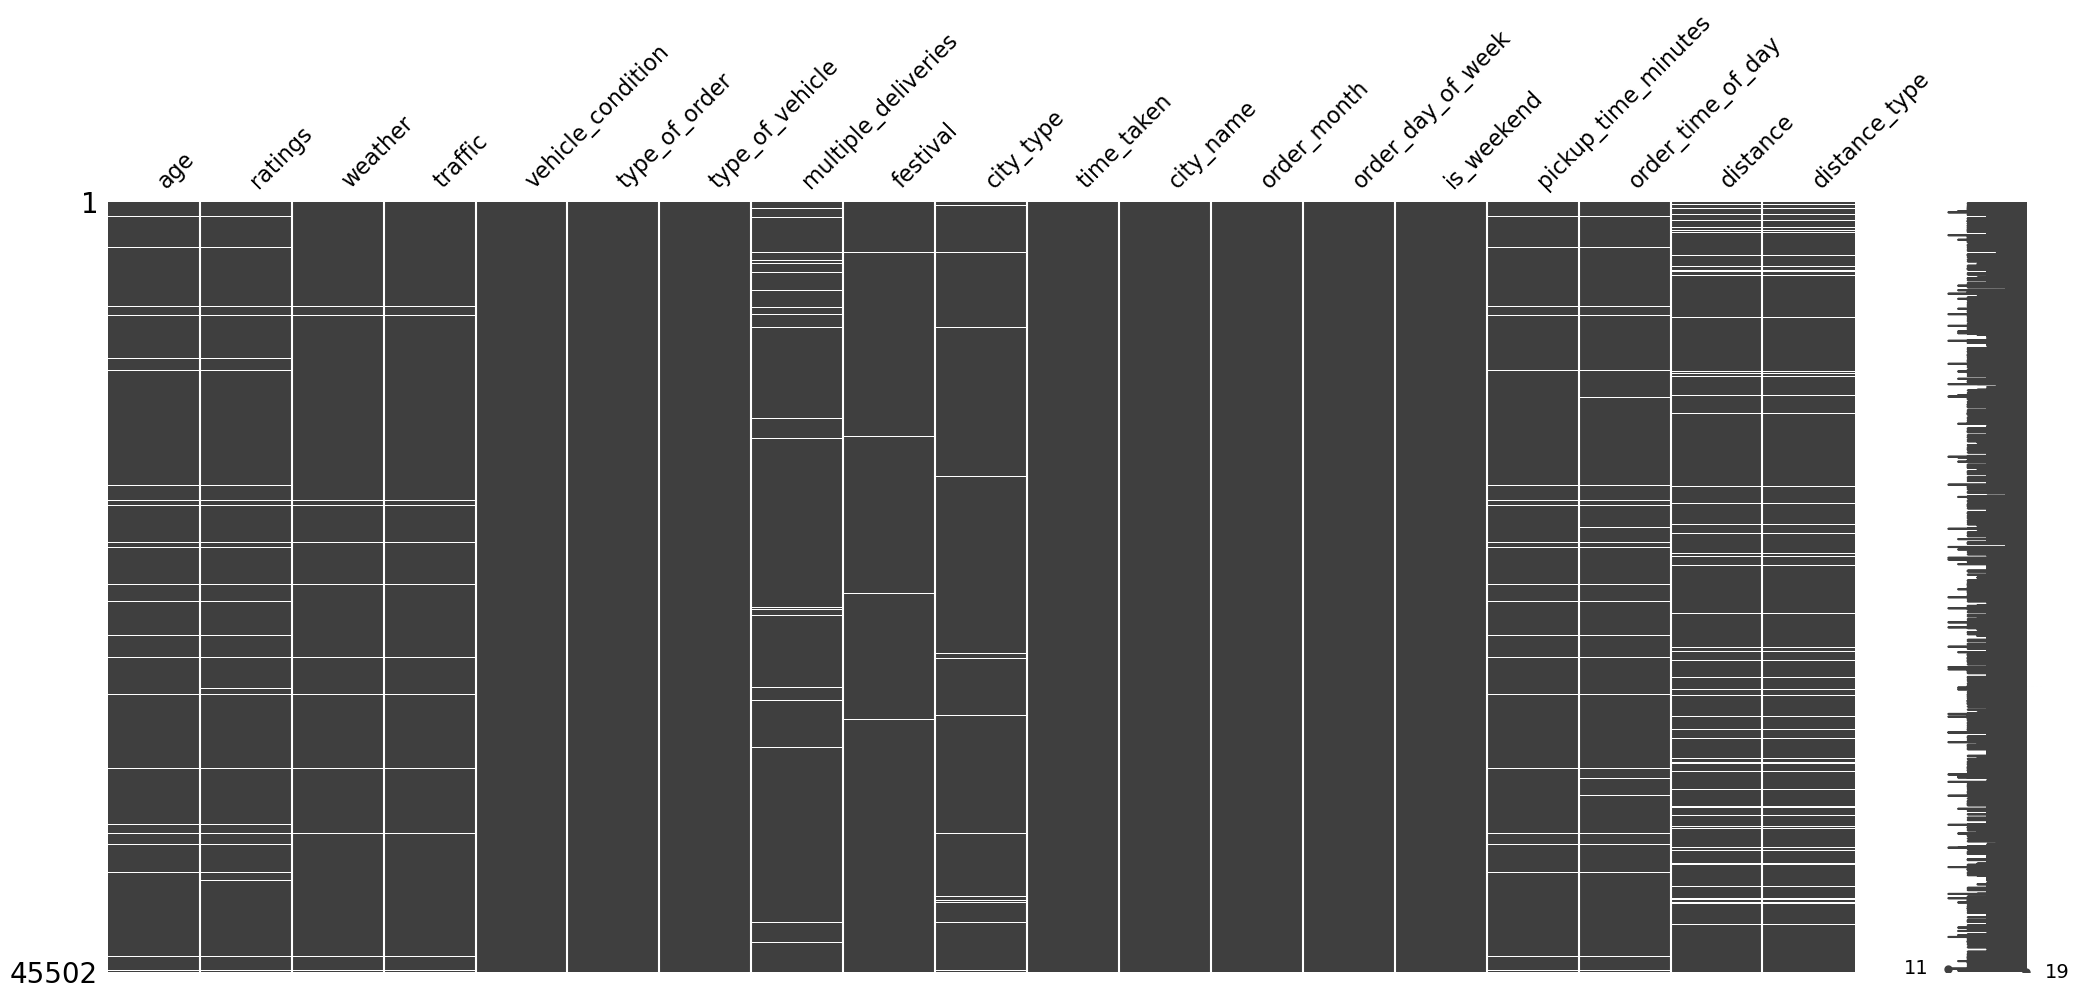

In [10]:
msno.matrix(df)

In [11]:
missing_cols = df.isna().any(axis=0).loc[lambda x: x].index
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

# Baseline model

- without imputation


In [12]:
temp_df = df.copy(deep=True).dropna()

In [13]:
temp_df.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
time_taken             0
city_name              0
order_month            0
order_day_of_week      0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [14]:
temp_df.shape

(37695, 19)

In [15]:
X = temp_df.drop(columns="time_taken", axis=1)
y = temp_df["time_taken"]
X.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,saturday,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,friday,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,saturday,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,tuesday,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,saturday,1,15.0,afternoon,6.210138,medium


In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytest.shape, ytrain.shape

((30156, 18), (7539, 18), (7539,), (30156,))

In [17]:
temp_df.columns.tolist()

['age',
 'ratings',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'time_taken',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'pickup_time_minutes',
 'order_time_of_day',
 'distance',
 'distance_type']

In [18]:
num_cols = ["age", "ratings", "pickup_time_minutes", "distance"]

nominal_cat_cols = [
    "weather",
    "type_of_order",
    "type_of_vehicle",
    "festival",
    "city_type",
    "city_name",
    "order_month",
    "order_day_of_week",
    "order_time_of_day",
    "is_weekend",
]
ordinal_cat_cols = ["traffic", "distance_type"]

In [19]:
for col in ordinal_cat_cols:
    print(col, temp_df[col].unique())

traffic ['high' 'jam' 'low' 'medium']
distance_type ['short', 'very_long', 'medium', 'long']
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']


In [20]:
traffic_order = ["low", "medium", "high", "jam"]
distance_order = ["short", "medium", "long", "very_long"]

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", MinMaxScaler(), num_cols),
        (
            "nominal_encode",
            OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False),
            nominal_cat_cols,
        ),
        (
            "ordinal_encode",
            OrdinalEncoder(categories=[traffic_order, distance_order]),
            ordinal_cat_cols,
        ),
    ],
    remainder="passthrough",
    n_jobs=3,
    verbose_feature_names_out=False,
)
preprocessor.set_output(transform="pandas")

ColumnTransformer(n_jobs=3, remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'order_time_of_day', 'is_weekend']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [22]:
xtrain_transform = preprocessor.fit_transform(xtrain)
xtest_transform = preprocessor.transform(xtest)

In [23]:
xtrain_transform.head()

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,order_day_of_week_tuesday,order_day_of_week_wednesday,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,is_weekend_1,traffic,distance_type,vehicle_condition,multiple_deliveries
8720,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0,2.0
25245,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1.0
34118,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1,0.0
26036,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0,1.0
37194,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1.0


In [ ]:
# yeo=johnson transfor in label
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

y_train_transformed = pt.fit_transform(ytrain.values.reshape(-1, 1))
y_test_transformed = pt.transform(ytest.values.reshape(-1, 1))

In [25]:
y_train_transformed

,x0
0,2.028672
1,0.554539
2,-2.024267
3,-0.173699
4,0.554539
...,...
30151,0.457580
30152,-0.173699
30153,-1.350937
30154,0.047111


In [26]:
pt.lambdas_

array([0.32446096])

# Model I -- baseline model


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain_transform, y_train_transformed)

LinearRegression()

In [ ]:
transformed_res = lr.predict(xtest_transform)
print("mae_transformed_yoe :", mean_absolute_error(y_test_transformed, transformed_res))
lr1 = LinearRegression()
lr1.fit(xtrain_transform, ytrain)
original_pred = lr1.predict(xtest_transform)
print("original-ytest :", mean_absolute_error(ytest, original_pred))

mae_transformed_yoe : 0.5154786687507606
original-ytest : 4.684188706200984


In [29]:
transformed_res

array([[ 0.16426446],
       [ 0.48287179],
       [ 0.58686043],
       ...,
       [ 0.70188119],
       [ 0.07723214],
       [-0.66821693]])

In [ ]:
y_pred_test_inverse = pt.inverse_transform(transformed_res.reshape(-1, 1))

In [31]:
y_pred_test_inverse

array([[27.10373511],
       [30.25878684],
       [31.3381296 ],
       ...,
       [32.56099252],
       [26.28093231],
       [19.88873853]])

### Train error and test error


In [ ]:
ytrain_pred = pt.inverse_transform(lr.predict(xtrain_transform).reshape(-1, 1))
ytest_pred = pt.inverse_transform(lr.predict(xtest_transform).reshape(-1, 1))
print("MAE: Train error: ", mean_absolute_error(ytrain, ytrain_pred))
print("MAE: Test error: ", mean_absolute_error(ytest, ytest_pred))

Train error:  4.7050241534221415
Test error:  4.689894700994873


In [ ]:
print("r2: Train score: ", r2_score(ytrain, ytrain_pred))
print("r2: Test score: ", r2_score(ytest, ytest_pred))

r2: Train score:  0.6009446783414196
r2: Test score:  0.596774227957171


## Impute Missing value


In [ ]:
temp_df = df.copy(deep=True)

In [46]:
X = temp_df.drop(columns="time_taken")
y = temp_df["time_taken"]

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
xtrain.shape,xtest.shape,xtrain.shape[0]+xtest.shape[0],temp_df.shape

((36401, 18), (9101, 18), 45502, (45502, 19))

In [52]:
xtrain.isna().sum().sum()

14565

In [53]:
xtest.isna().sum().sum()

3621

In [58]:
pt=PowerTransformer()

y_train_transformed=pt.fit_transform(ytrain.values.reshape(-1,1))

y_test_transformed=pt.transform(ytest.values.reshape(-1,1))

In [59]:
ytrain.values.reshape(-1,1)

array([[19],
       [20],
       [29],
       ...,
       [33],
       [29],
       [30]])

In [60]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')